# Projektaufgabe: Deskriptive Statistik und Visualisierungen

Für den Online-Artikel zum Kundenstamm der Bibliothek braucht die Pressestelle einige interessanten Zahlen zum **Thema Alter und Bibliotheksnutzung**. Außerdem möchte sie die Daten in einer Info-Graphik zusammenstellen.

Für eine erste Demo bist Du verantwortlich:

    Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
    Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

Lade bis spätestens 18.03.24 Deinen Report in Form eines Jupyter Notebooks in der Dateiablage in Moodle hoch.

Website der Bibliothek: https://sfpl.org/

Daten zur Nutzung der **San Francisco Library** (*https://sfpl.org/*) sind auf der Website *https://data.sfgov.org/Culture-and-Recreation/Library-Usage/qzz6-2jup/about_data* verfügbar. 
Dort befindt sich Klarstellungen zu den bereitgestellten Daten, wie z. B. der Menge (436.290 Zeilen), was sie umfassen ('Patron Type Code', 'Patron Type Definition',  'Total Checkouts', 'Total Renewals', 'Age Range', 'Home Library Code', 'Home Library Definition', 'Circulation Active Month', 'Circulation Active Year', 'Notification Preference Code', 'Notification Code Definition', 'Provided Email Address', 'Within San Francisco County', 'Year Patron Registered') und um welchen Typ es sich dabei handelt (Zahlen oder Texte).

Die ersten vorgestellten Kategorien (*'Patron Type Code'* und *'Patron Type Definition'*) umfassen die Benutzertypen: 'Staff', 'Welcome', 'Visitor', 'Digital Access Card', 'Juvenile', 'Senior', 'Adult', 'Teen', 'Retired Staff', 'Teacher Card', 'At User Adult', 'At User Senior', 'At User Welcome', 'At User Teen', 'Business', 'Library By Mail', 'At User Juvenile'. Obwohl es sich auf den ersten Blick um relevante Informationen zu handeln scheint, sind sie für unsere Forschung nicht sehr nützlich, da wir nicht wissen, nach welchen Kriterien sie definiert wurden. Daher lassen wir sie für diese Datensynthese beiseite und wir bevorzugen Daten aus der Kategorie 'Age Range'.

Da sie zunächst als nicht relevant erachtet werden, bleiben folgende Parameter ebenfalls unberücksichtigt: 'Total Renewals'
'Home Library Code' und 'Within San Francisco County'. 

Zur Analyse verbleiben: **'Total Checkouts', 'Age Range', 'Home Library Definition', 'Circulation Active Month', 'Circulation Active Year', 'Notice Preference Code', 'Notice Preference Definition', 'Provided Email Address' und 'Year Patron Registered'**.

Basierend auf den Informationen zur **'Age Range'** wurden vier Kategorien von Benutzern definiert:
- Jugendliche (von 0 bis 19 Jahre);
- Erwachsene (von 20 bis 59 Jahre); und
- Senioren (ab 60 Jahren).

Es sind 99.549 Jugendliche (von 0 bis 19 Jahre), 267.164 Erwachsene (von 20 bis 59 Jahre) und 68.665 Senioren (ab 60 Jahren) registriert.


In [41]:
# todas as bibliotecas que preciso para realizar meu projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_theme()

In [42]:
# arquivo que usarei com os dados da biblioteca de San Francisco

df = pd.read_csv("../data/Library_Usage.csv",
    low_memory=False
)

In [43]:
# para saber um pouco mais sobre os dados, de que tipo sao e quantas linhas contêm itens vazios

df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Within San Francisco County'],
      dtype='object')

In [44]:
# primeira olhada nos dados
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436285,0,Adult,2,6,35 to 44 years,yjj,Bookmobile,Oct,2022.0,z,Email,True,2020,NaN
436286,2,Teen,3,0,10 to 19 years,yjj,Bookmobile,Nov,2015.0,z,Email,True,2011,NaN
436287,0,Adult,6,0,60 to 64 years,ylw,Bookmobile,Mar,2022.0,z,Email,True,2022,NaN
436288,15,Teacher Card,4,0,35 to 44 years,ylw,Bookmobile,Sep,2020.0,z,Email,True,2019,NaN


In [45]:
df['Patron Type Definition'].unique()

array(['Staff', 'Welcome', 'Visitor', 'Digital Access Card', 'Juvenile',
       'Senior', 'Adult', 'Teen', 'Retired Staff', 'Teacher Card',
       'At User Adult', 'At User Senior', 'At User Welcome',
       'At User Teen', 'Business', 'Library By Mail', 'At User Juvenile'],
      dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436290 entries, 0 to 436289
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              436290 non-null  int64  
 1   Patron Type Definition        436290 non-null  object 
 2   Total Checkouts               436290 non-null  int64  
 3   Total Renewals                436290 non-null  int64  
 4   Age Range                     435378 non-null  object 
 5   Home Library Code             436288 non-null  object 
 6   Home Library Definition       436260 non-null  object 
 7   Circulation Active Month      396777 non-null  object 
 8   Circulation Active Year       396777 non-null  float64
 9   Notice Preference Code        393301 non-null  object 
 10  Notice Preference Definition  393301 non-null  object 
 11  Provided Email Address        436290 non-null  bool   
 12  Year Patron Registered        436290 non-nul

In [47]:
# Selecionar somente as colunas que me interessam
df_selection = df[['Total Checkouts', 'Age Range', 'Home Library Definition', 'Circulation Active Month', 'Circulation Active Year', 'Notice Preference Code', 'Notice Preference Definition', 'Provided Email Address', 'Year Patron Registered']]

In [48]:
df_selection

,Total Checkouts,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered
0,53,NaN,Bayview,Mar,2023.0,z,Email,True,2003
1,480,NaN,Excelsior,Jun,2023.0,z,Email,True,2003
2,70,45 to 54 years,Noe Valley,Jan,2023.0,z,Email,True,2011
3,3934,NaN,Ocean View,Jul,2023.0,z,Email,True,2003
4,1118,NaN,Ortega,Jul,2023.0,z,Email,True,2003
...,...,...,...,...,...,...,...,...,...
436285,2,35 to 44 years,Bookmobile,Oct,2022.0,z,Email,True,2020
436286,3,10 to 19 years,Bookmobile,Nov,2015.0,z,Email,True,2011
436287,6,60 to 64 years,Bookmobile,Mar,2022.0,z,Email,True,2022
436288,4,35 to 44 years,Bookmobile,Sep,2020.0,z,Email,True,2019


In [49]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436290 entries, 0 to 436289
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Total Checkouts               436290 non-null  int64  
 1   Age Range                     435378 non-null  object 
 2   Home Library Definition       436260 non-null  object 
 3   Circulation Active Month      396777 non-null  object 
 4   Circulation Active Year       396777 non-null  float64
 5   Notice Preference Code        393301 non-null  object 
 6   Notice Preference Definition  393301 non-null  object 
 7   Provided Email Address        436290 non-null  bool   
 8   Year Patron Registered        436290 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 27.0+ MB


In [66]:
df_selection['Age Range'].unique()

array([nan, '45 to 54 years', '55 to 59 years', '60 to 64 years',
       '25 to 34 years', '35 to 44 years', '20 to 24 years',
       '75 years and over', '10 to 19 years', '0 to 9 years',
       '65 to 74 years'], dtype=object)

In [69]:
df_selection['Age Range'].value_counts()

Age Range
25 to 34 years       92669
35 to 44 years       81719
10 to 19 years       66857
45 to 54 years       48319
0 to 9 years         32692
65 to 74 years       31714
20 to 24 years       25381
75 years and over    19297
55 to 59 years       19076
60 to 64 years       17654
Name: count, dtype: int64

In [99]:
# categorias de usuários

juvenile=df_selection.loc[
    (df['Age Range'] == "0 to 9 years") | 
    (df['Age Range'] == "10 to 19 years")]

adult=df_selection.loc[
    (df['Age Range'] == "20 to 24 years") | 
    (df['Age Range'] == "25 to 34 years") | 
    (df['Age Range'] == "35 to 44 years") | 
    (df['Age Range'] == "45 to 54 years") |
    (df['Age Range'] == "55 to 59 years")]

senior=df_selection.loc[
    (df['Age Range'] == "60 to 64 years") | 
    (df['Age Range'] == "65 to 74 years") | 
    (df['Age Range'] == "75 years and over")]

In [100]:
# Número de usuários por categoria

print('Es sind ' + str(len(juvenile)) + ' Jugendliche (von 0 bis 19 Jahre), ' + str(len(adult)) + ' Erwachsene (von 20 bis 59 Jahre) und ' + str(len(senior)) + ' Senioren (ab 60 Jahren)' ' registriert.' )

Es sind 99549 Jugendliche (von 0 bis 19 Jahre), 267164 Erwachsene (von 20 bis 59 Jahre) und 68665 Senioren (ab 60 Jahren) registriert.


In [102]:
df_selection["Home Library Definition"].unique()

array(['Bayview', 'Excelsior', 'Noe Valley', 'Ocean View', 'Ortega',
       'West Portal', 'Main', 'Glen Park', 'Anza', 'Presidio', 'Portola',
       'North Beach', 'Golden Gate Valley', 'Richmond', 'Park', 'Marina',
       'Sunset', 'Potrero', 'Mission', 'Eureka Valley', 'Merced',
       'Chinatown', 'Mission Bay', 'Western Addition', 'Bernal',
       'Visitacion Valley', 'Parkside', 'Ingleside', 'Bookmobile', nan],
      dtype=object)

In [104]:
df_selection["Home Library Definition"].value_counts()

Home Library Definition
Main                  142000
Richmond               20656
Mission                18463
Mission Bay            16169
Ortega                 15442
Sunset                 14303
Excelsior              13656
Eureka Valley          12449
Chinatown              12376
Park                   11495
Marina                 11359
Bernal                 10976
West Portal            10842
Presidio               10378
North Beach            10350
Noe Valley             10311
Merced                 10248
Potrero                 9974
Parkside                8953
Anza                    8821
Western Addition        8804
Ingleside               8803
Glen Park               8229
Golden Gate Valley      6895
Portola                 6815
Bayview                 6518
Visitacion Valley       5440
Ocean View              3488
Bookmobile              2047
Name: count, dtype: int64

In [136]:
bookmobile=df_selection.loc[(df_selection['Home Library Definition'] == "Bookmobile")]

In [144]:
bookmobile['Total Checkouts'].describe()

count    2047.000000
mean      126.964827
std       423.009226
min         0.000000
25%         1.000000
50%         7.000000
75%        55.000000
max      6707.000000
Name: Total Checkouts, dtype: float64

/home/rafaela/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


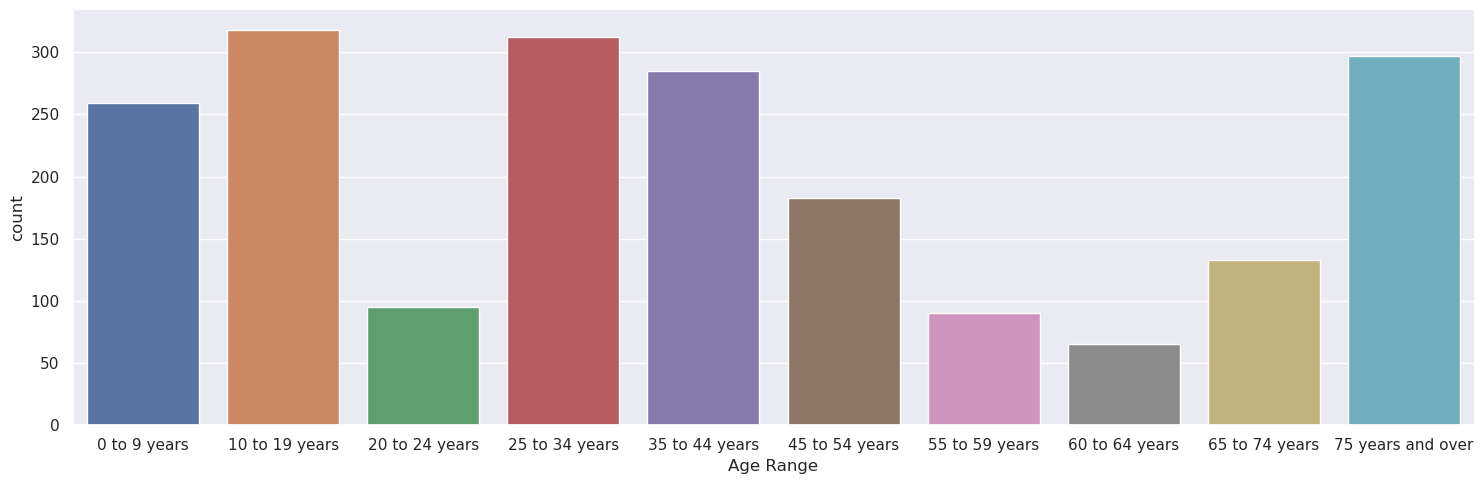

In [137]:
# quantidade de usuários do Bookmobile por faixa etária
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']
sns.catplot(x='Age Range', kind="count", data=bookmobile, order=my_order, aspect=3)

In [112]:
pd.crosstab(df_selection['Home Library Definition'], df_selection['Age Range'])

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
Anza,578,1328,547,1740,1602,1017,387,365,787,455
Bayview,530,1924,505,991,962,563,257,270,371,126
Bernal,1121,2367,414,1669,2036,1332,497,376,726,416
Bookmobile,259,318,95,312,285,183,90,65,133,297
Chinatown,479,2635,908,2281,1836,1249,504,517,1210,730
Eureka Valley,577,1401,528,2947,2605,1647,709,591,920,512
Excelsior,1302,4308,1057,1893,1666,1162,479,454,827,489
Glen Park,551,1293,348,1071,1512,1214,463,436,821,500
Golden Gate Valley,347,504,300,2126,1481,615,297,261,522,435


In [ ]:
my_order =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']
sns.catplot(x='Age Range', kind="count", data=mission_district, order=my_order, aspect=3)